In [7]:
# Importing data manipulation libraries and data visualisation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
train = pd.read_csv("train_ticket_data.csv",
                   parse_dates=["departure"],
                    dtype={
                        "origin": "category",
                        "destination": "category",
                        "vehicle_type": "category",
                        "vehicle_class": "category",
                        "fare":"category"
                    }
                   ).drop("Unnamed: 0", axis=1)

In [13]:
train.head()

,origin,destination,departure,duration,vehicle_type,vehicle_class,price,fare
0,MADRID,BARCELONA,2019-05-18 20:30:00,3.17,AVE,Turista Plus,69.80,Promo
1,MADRID,BARCELONA,2019-05-18 06:20:00,3.15,AVE,Turista,66.75,Promo
2,MADRID,BARCELONA,2019-05-18 07:30:00,3.17,AVE,Turista,85.10,Promo
3,MADRID,BARCELONA,2019-05-18 07:30:00,3.17,AVE,Turista,85.10,Promo
4,MADRID,BARCELONA,2019-05-18 09:30:00,3.07,AVE,Turista,85.10,Promo


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525950 entries, 0 to 1525949
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   origin         1525950 non-null  category      
 1   destination    1525950 non-null  category      
 2   departure      1525950 non-null  datetime64[ns]
 3   duration       1525950 non-null  float64       
 4   vehicle_type   1525950 non-null  category      
 5   vehicle_class  1525642 non-null  category      
 6   price          1458886 non-null  float64       
 7   fare           1525642 non-null  category      
dtypes: category(5), datetime64[ns](1), float64(2)
memory usage: 42.2 MB


In [16]:
from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(
    categories=[
        "Monday", 
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
        "Sunday"
    ], 
    ordered=True)

# Creating departure, day_of_week and hours columns

train = train.assign(
    arrival= train["departure"] + pd.to_timedelta(train["duration"], unit="H"),
    departure_dayofweek = (train["departure"].dt.day_name().astype(cat_type)),
    departure_hour = train["departure"].dt.hour,
    vehicle_category = (train["vehicle_type"]
                        .map({"AVE": "High-Speed", 
                              "AVE-TGV": "High-Speed", 
                              "R. EXPRES": "Standard",
                              "LD-AVE": "Standard",
                              "AVE-LD": "Standard",
                              "MD-AVE": "Standard",
                              "LD-MD": "Standard"                          
                        }))
)

In [17]:
# Summary statistics
train.describe().round()

,duration,price,departure_hour
count,1525950.0,1458886.0,1525950.0
mean,3.0,86.0,13.0
std,1.0,22.0,5.0
min,2.0,41.0,5.0
25%,2.0,75.0,8.0
50%,3.0,85.0,13.0
75%,3.0,100.0,17.0
max,11.0,235.0,21.0


In [18]:
train.loc[train["price"] == train["price"].max()]

,origin,destination,departure,duration,vehicle_type,vehicle_class,price,fare,arrival,departure_dayofweek,departure_hour,vehicle_category
1524831,BARCELONA,MADRID,2019-05-31 12:50:00,2.92,AVE-TGV,Preferente,235.3,Flexible,2019-05-31 15:45:12,Friday,12,High-Speed
1524852,BARCELONA,MADRID,2019-05-31 12:50:00,2.92,AVE-TGV,Preferente,235.3,Flexible,2019-05-31 15:45:12,Friday,12,High-Speed


In [19]:
train.loc[train["price"] == train["price"].min()]

,origin,destination,departure,duration,vehicle_type,vehicle_class,price,fare,arrival,departure_dayofweek,departure_hour,vehicle_category
1416363,BARCELONA,MADRID,2019-05-28 21:15:00,2.78,AVE,Turista,40.93,Promo,2019-05-29 00:01:48,Tuesday,21,High-Speed
1416383,BARCELONA,MADRID,2019-05-28 21:15:00,2.78,AVE,Turista,40.93,Promo,2019-05-29 00:01:48,Tuesday,21,High-Speed
1419884,BARCELONA,MADRID,2019-05-28 21:15:00,2.78,AVE,Turista,40.93,Promo,2019-05-29 00:01:48,Tuesday,21,High-Speed
1419913,BARCELONA,MADRID,2019-05-28 21:15:00,2.78,AVE,Turista,40.93,Promo,2019-05-29 00:01:48,Tuesday,21,High-Speed


In [20]:
# Mean price of trains leaving Madrid
train.query("origin == 'MADRID'").price.mean()

86.01552504730397

In [ ]:
# # Mean price of trains leaving Barcelona
train.query("origin == 'BARCELONA'").price.mean()

In [22]:
# Grouping the dataframe
train_summary = (train
 .groupby(train["departure"].dt.date)
 .agg(
     ridership = ("price", "count"),
     total_fare = ("price", "sum"),
      )
).reset_index()

train_summary.head()

,departure,ridership,total_fare
0,2019-05-01,27752,2245333.78
1,2019-05-02,28602,2119504.40
2,2019-05-03,32322,2921006.38
3,2019-05-04,22838,1948140.10
4,2019-05-05,31110,3215268.30


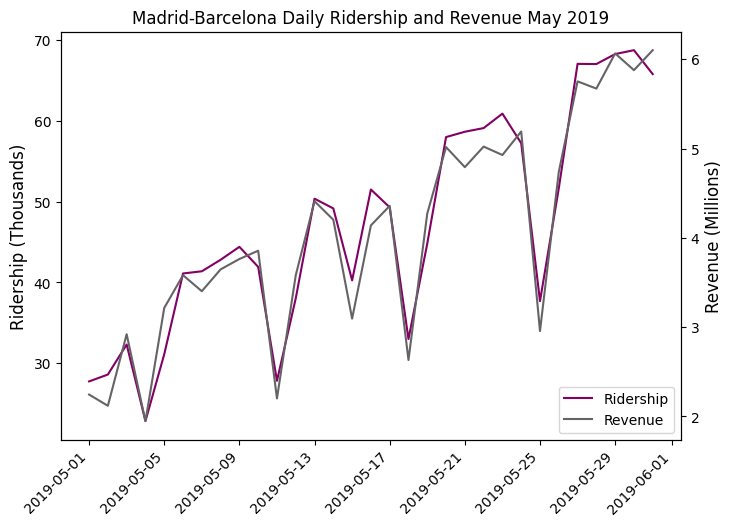

In [23]:
# Creating a line chart using the Dataframe above
fig, ax = plt.subplots(figsize=(8, 6))
 
ax.set_title("Madrid-Barcelona Daily Ridership and Revenue May 2019")
 
ax.plot(
    train_summary["departure"], 
    train_summary["ridership"] / 1000,
    c="#830065",
    label="Ridership"
)
ax.set_ylabel("Ridership (Thousands)", fontsize=12)
 
ax2 = ax.twinx()
 
ax2.plot(
    train_summary["departure"], 
    train_summary["total_fare"] / 1000000,
    c="#666366",
    label="Revenue"
)
ax2.set_ylabel("Revenue (Millions)", fontsize=12)
 
fig.autofmt_xdate(rotation=45)
fig.legend(bbox_to_anchor=(.9, .3))
 
plt.show()

SyntaxError: invalid syntax (1283359658.py, line 1)